# Cluster_engines

## Useful functions

In [5]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
help(sblpyt)


Help on class SBL_pytools in module SBL_pytools:

class SBL_pytools(builtins.object)
 |  Static methods defined here:
 |  
 |  convert_eps_to_png(ifname, osize)
 |  
 |  convert_pdf_to_png(ifname, osize)
 |  
 |  find_and_convert(suffix, odir, osize)
 |      # find file with suffix, convert, and return image file
 |  
 |  find_and_show_images(suffix, odir, osize)
 |  
 |  find_file_in_output_directory(suffix, odir)
 |  
 |  show_eps_file(eps_file, osize)
 |  
 |  show_image(img)
 |  
 |  show_log_file(odir)
 |  
 |  show_pdf_file(pdf_file)
 |  
 |  show_row_n_images(images, size)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Part I : k-means 

### Options.

The main options of the <b>runKMeans</b> method in the next cell are:
 - <em>points</em>: Text file listing D-dimensional points
 - <em>k</em>: number of output clusters
 - <em>selector</em>: selection of initial seeds (random, plusplus or minimax)
 - <em>itermax</em>: maximal number of iterations

In [6]:
import re  #regular expressions
import sys #misc system
import os
import pdb
import shutil # python 3 only

odir = "tmp-results-kmeans-euclid"
if os.path.exists(odir):
    os.system("rm -rf %s" % odir)
os.system( ("mkdir %s" % odir) )

def run_k_means(points, k, selector = "plusplus", itermax = 10): 
       
    # check executable exists and is visible
    exe = shutil.which("sbl-cluster-k-means-euclid.exe")
    if exe:
        print(("Using executable %s\n" % exe))
        cmd = "sbl-cluster-k-means-euclid.exe -v -l -d %s --points-file %s --k-means-k %d\
              --k-means-selector %s --k-means-itermax %d" %\
        (odir, points, k, selector, itermax)
        print("Running:", cmd)
        os.system(cmd)
        
        cmd = "ls %s" % odir
        ofnames = os.popen(cmd).readlines()
        print("All output files:",ofnames)
        
        #find the log file and display log file
        sblpyt.show_log_file(odir)
        
        exed = shutil.which("sbl-clusters-display.py")
        if exed:
            cmd = "%s -f %s  \
                -c %s/sbl-cluster-k-means-euclid__clusters.txt  -C %s/sbl-cluster-k-means-euclid__centers.txt -o %s" % (exed, points,odir,odir,odir)
            print("\n Display command",cmd)
            os.system(cmd)
        
    else:
        print("Executable not found")
        

In [7]:

ifiles = ["data/points-N100-d2.txt", "data/points-N100-d4.txt", "data/points-N100-d6.txt", "data/points-N200-d50.txt"]
#ifiles = [ "data/points-N200-d50.txt"]

for ifile in ifiles:
    print("\nMarker : Calculation Started")
    run_k_means(ifile, 4)
    print("Marker : Calculation Ended")


Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-cluster-k-means-euclid.exe

Running: sbl-cluster-k-means-euclid.exe -v -l -d tmp-results-kmeans-euclid --points-file data/points-N100-d2.txt --k-means-k 4              --k-means-selector plusplus --k-means-itermax 10
All output files: ['sbl-cluster-k-means-euclid__centers.txt\n', 'sbl-cluster-k-means-euclid__clusters.txt\n', 'sbl-cluster-k-means-euclid__log.txt\n']
Log file is: tmp-results-kmeans-euclid/sbl-cluster-k-means-euclid__log.txt
Running:  sbl-cluster-k-means-euclid.exe -v -l -d tmp-results-kmeans-euclid --points-file data/points-N100-d2.txt --k-means-k 4 --k-means-selector plusplus --k-means-itermax 10

D-points Loader
Statistics:
Number of loaded data: 1
-- Number of loaded points in ensemble: 500

Cluster Engine
Statistics:
-- Number of clusters : 4
-- Size of clusters : (0, 169) (1, 84) (2, 97) (3, 150)

Report...

End Run

General Statistics:

Times elapsed for computa

### Let us display the clusters 

Images: ['tmp-results-kmeans-euclid/points-N100-d2--sbl-cluster-k-means-euclid__clusters--sbl-cluster-k-means-euclid__centers.png', 'tmp-results-kmeans-euclid/points-N100-d4--sbl-cluster-k-means-euclid__clusters--sbl-cluster-k-means-euclid__centers.png', 'tmp-results-kmeans-euclid/points-N100-d6--sbl-cluster-k-means-euclid__clusters--sbl-cluster-k-means-euclid__centers.png', 'tmp-results-kmeans-euclid/points-N200-d50--sbl-cluster-k-means-euclid__clusters--sbl-cluster-k-means-euclid__centers.png']
Figs displayed


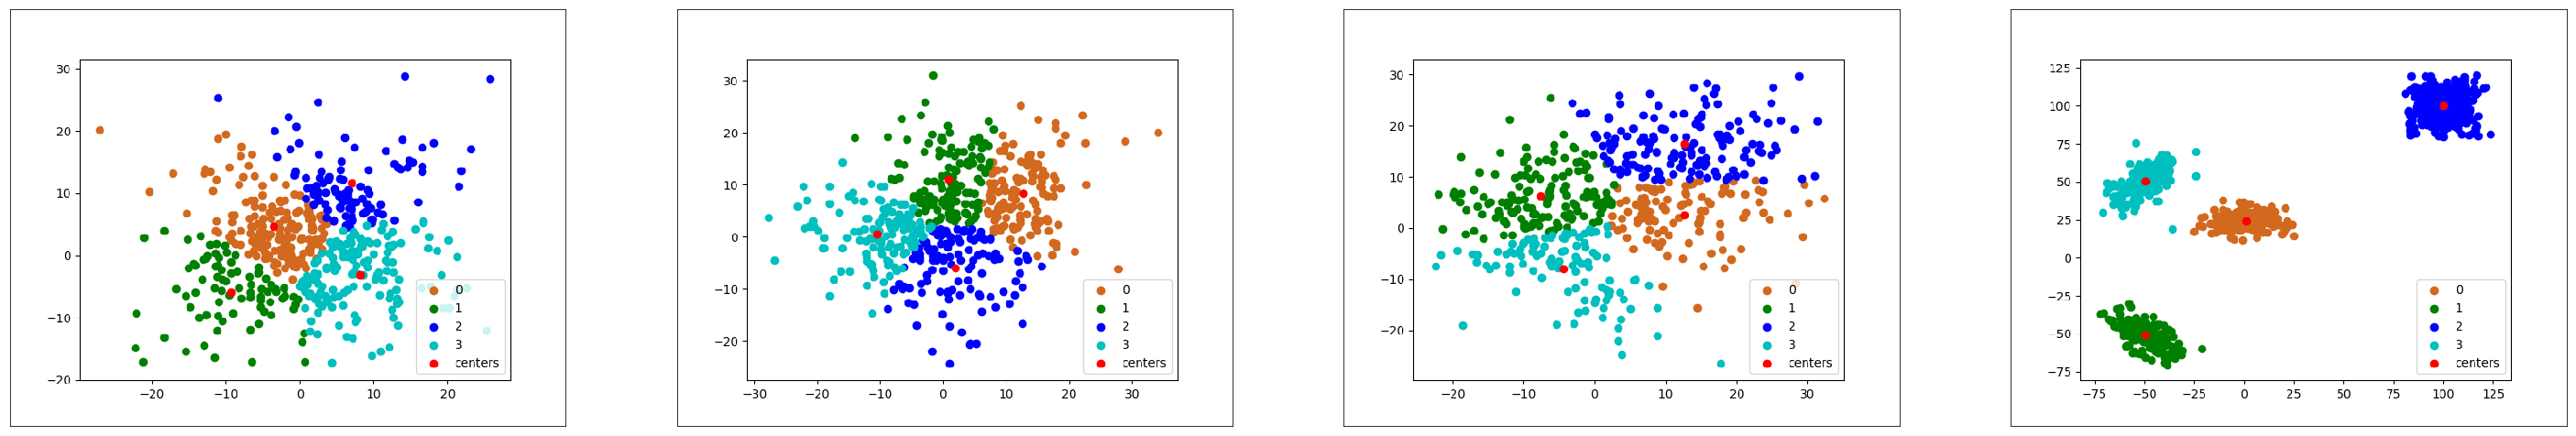

In [9]:
odir = "tmp-results-kmeans-euclid"
sblpyt.find_and_show_images(".png", odir, 50)

## Part II : Morse theory based clustering

### Options.

The main options of the <b>runMTB</b> method in the next cell are:
 - <em>points</em>: Text file listing D-dimensional points
 - <em>nbNeighbors</em>: number of neighbors for the NNG computation
 - <em>distance</em>: distance range for the nearest neighbor graph (NNG) computation
 - <em>persistence</em>: persistence threshold

In [10]:
import sys #misc system
import os
import pdb
import shutil # python 3 only

odir = "tmp-results-MTB-euclid"
if os.path.exists(odir):
    os.system("rm -rf %s" % odir)
os.system( ("mkdir %s" % odir) )


def run_MTB(points, nbNeighbors = 8, distance = None, persistence = -1): 
   
    
    # check executable exists and is visible
    exe = shutil.which("sbl-cluster-MTB-euclid.exe")
    if exe:
        print(("Using executable %s\n" % exe))
        if distance:
            cmd = "sbl-cluster-MTB-euclid.exe -v -l -d %s --points-file %s\
                  --distance-range %f --persistence-threshold %f" %\
                  (odir, points, distance, persistence)
        else:
            cmd = "sbl-cluster-MTB-euclid.exe -v -l -d %s --points-file %s --num-neighbors %d\
                  --persistence-threshold %f" %\
                  (odir, points, nbNeighbors, persistence)
        print("Running:", cmd)
        os.system(cmd)
        
        cmd = "ls %s" % odir
        ofnames = os.popen(cmd).readlines()
        print("All output files:",ofnames)
        
        #find the log file and display log file
        cmd = "find %s -name \"*log.txt\"" % odir
        lines = os.popen(cmd).readlines()
        if len(lines) > 0:
            lfname = lines[0].rstrip()
            print("Log file is:", lfname)
            log = open(lfname).readlines()
            for line in log:         print(line.rstrip())
        
            
        exed = shutil.which("sbl-clusters-display.py")
        if exed:
            cmd = "%s -f %s  \
                -c %s/sbl-cluster-MTB-euclid__clusters.txt  \
                -C %s/sbl-cluster-MTB-euclid__centers.txt \
                -p %s/sbl-cluster-MTB-euclid__persistence_diagram.txt -o %s" % (exed, points,odir,odir,odir,odir)
 
            print("\n Display command",cmd)
            os.system(cmd)
    else:
        print("Executable not found")

In [11]:
ifiles = ["data/points-N100-d2.txt", "data/points-N100-d4.txt", "data/points-N100-d6.txt", "data/points-N200-d50.txt"]
#ifiles = ["data/points-N100-d2.txt"]

for ifile in ifiles:
    print("Marker : Calculation Started")
    run_MTB(ifile, persistence = 0.01)      
    print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-cluster-MTB-euclid.exe

Running: sbl-cluster-MTB-euclid.exe -v -l -d tmp-results-MTB-euclid --points-file data/points-N100-d2.txt --num-neighbors 8                  --persistence-threshold 0.010000
All output files: ['sbl-cluster-MTB-euclid__centers.txt\n', 'sbl-cluster-MTB-euclid__clusters.txt\n', 'sbl-cluster-MTB-euclid__log.txt\n', 'sbl-cluster-MTB-euclid__msw_edges.txt\n', 'sbl-cluster-MTB-euclid__msw_points.txt\n', 'sbl-cluster-MTB-euclid__msw_weights.txt\n', 'sbl-cluster-MTB-euclid__persistence_diagram.txt\n']
Log file is: tmp-results-MTB-euclid/sbl-cluster-MTB-euclid__log.txt
Running:  sbl-cluster-MTB-euclid.exe -v -l -d tmp-results-MTB-euclid --points-file data/points-N100-d2.txt --num-neighbors 8 --persistence-threshold 0.010000

D-points Loader
Statistics:
Number of loaded data: 1
-- Number of loaded points in ensemble: 500

Cluster Engine
Statistics:
-- Number of clusters 

### Let us display the clusters together with the persistence diagrams (PD)
For PD, note that points are below the diagoal: one cluster is defined as a mode of the dentisy estimated associated with
the point cloud, so that we study the stable super-level sets of this estimated density.

Images: ['tmp-results-MTB-euclid/points-N100-d6--sbl-cluster-MTB-euclid__clusters--sbl-cluster-MTB-euclid__centers.png', 'tmp-results-MTB-euclid/points-N100-d2--sbl-cluster-MTB-euclid__clusters--sbl-cluster-MTB-euclid__centers.png', 'tmp-results-MTB-euclid/points-N200-d50--sbl-cluster-MTB-euclid__clusters--sbl-cluster-MTB-euclid__centers.png', 'tmp-results-MTB-euclid/points-N100-d4--sbl-cluster-MTB-euclid__clusters--sbl-cluster-MTB-euclid__centers.png']
Figs displayed
Images: ['tmp-results-MTB-euclid/points-N100-d2--sbl-cluster-MTB-euclid__clusters--persistences.png', 'tmp-results-MTB-euclid/points-N100-d4--sbl-cluster-MTB-euclid__clusters--persistences.png', 'tmp-results-MTB-euclid/points-N100-d6--sbl-cluster-MTB-euclid__clusters--persistences.png', 'tmp-results-MTB-euclid/points-N200-d50--sbl-cluster-MTB-euclid__clusters--persistences.png']
Figs displayed


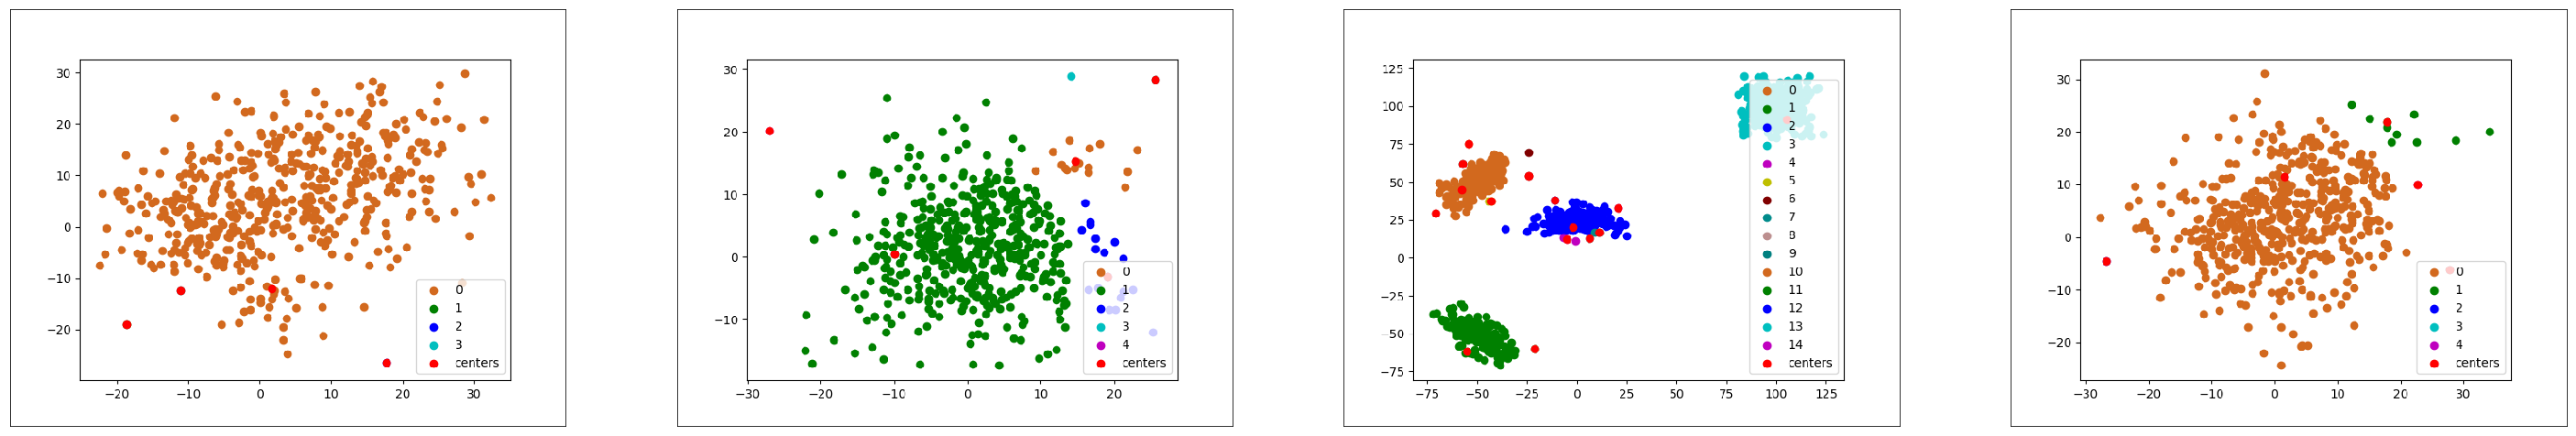

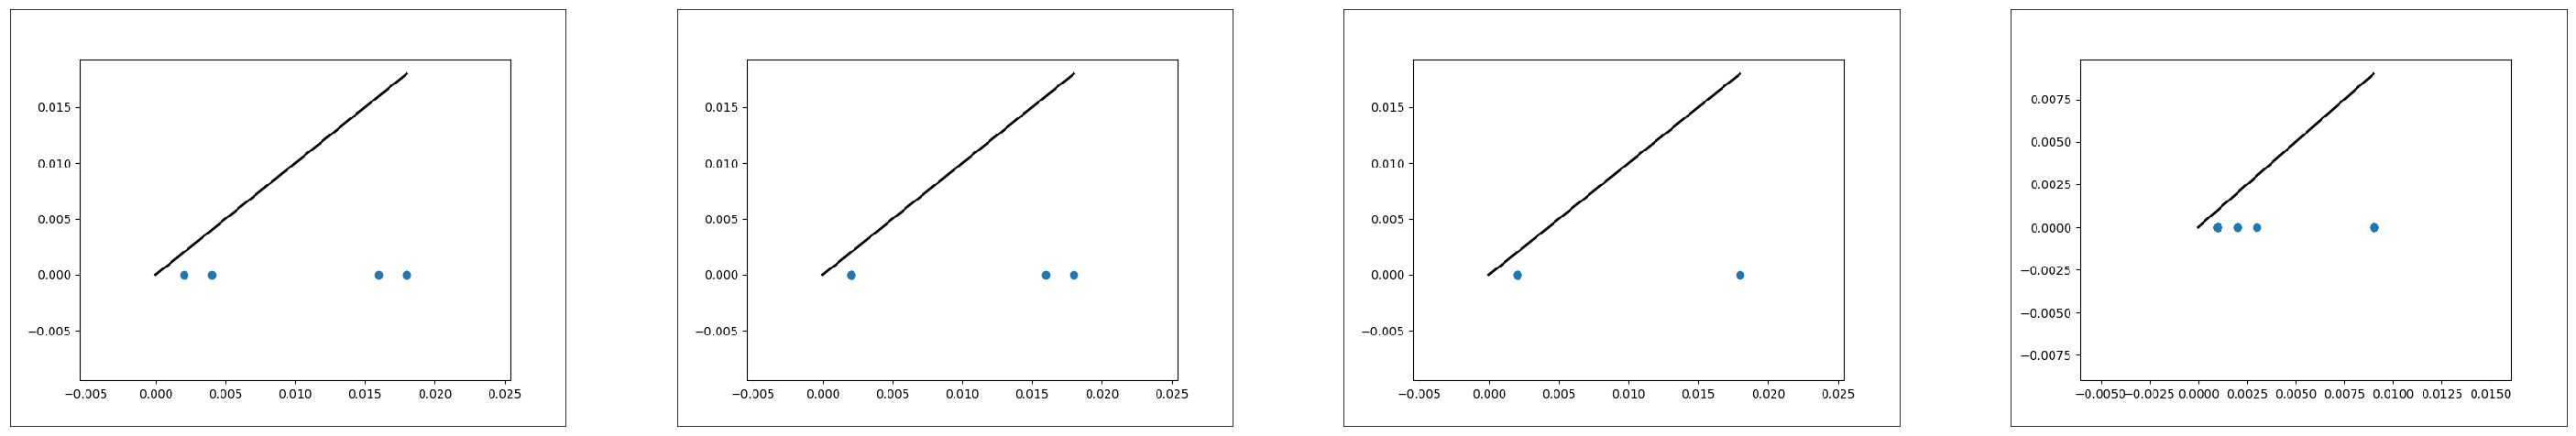

In [12]:
odir = "tmp-results-MTB-euclid"
sblpyt.find_and_show_images("euclid__centers.png", odir, 50)
sblpyt.find_and_show_images("clusters--persistences.png", odir, 50)